# Problem Statement

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term.

The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can benefit the workers in this field, as the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning. The ability to do so far more efficiently and even more effectively than experienced manual labor could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.

# Objective

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the data containing images of unique plants belonging to 12 different species. You being a data scientist, need to build a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.

# Data Description

This dataset contains images of unique plants belonging to 12 different species.
The data file names are:
- images.npy
- Label.csv

Due to the large volume of data, the images were converted to numpy arrays and stored in images.npy file and the corresponding labels are also put into Labels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.

The goal of the project is to create a classifier capable of determining a plant's species from an image.

**Plants Species:**
- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

# Table of Contents

- **<a href = #link1>Importing Libraries</a>**
- **<a href = #link2>Reading in the Dataset</a>**
- **<a href = #link3>Data Overview</a>**
- **<a href = #link4>Exploratory Data Analysis</a>**
- **<a href = #link5>Data Pre-Processing</a>**
  - <a href = #link6>Resizing and Normalizing Images</a>
  - <a href = #link7>Preparing the Data</a>
- **<a href = #link8>Initial Model Building</a>**
  - <a href = #link9>Adding Class Weights</a>
- **<a href = #link10>Model Tuning</a>**
  - <a href = #link11>Data Augmentation</a>
  - <a href = #link12>Transfer Learning</a>
  - <a href = #link13>InceptionV3</a>
  - <a href = #link14>Removing the Class Weights</a>
  - <a href = #link15>Decreasing the Data Augmentation</a>
- **<a href = #link16>Final Model Performance Comparison</a>**
- **<a href = #link17>Conclusion</a>**

# <a id= 'link1'>Importing Libraries</a>

In [1]:
#!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.0 MB/s 


In [2]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs
import random                                                                                    # for setting random seeds
from sklearn import metrics



# Tensorflow modules
import tensorflow as tf
from tensorflow.keras import backend                                                             # For clearing the backend during model building/testing
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD,RMSprop                                         # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer                                                 # For OHE of dataset labels
from keras import callbacks                                                                      # For early stopping
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner
from keras_tuner.tuners import BayesianOptimization

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# <a id= 'link2'>Reading in the DataSet</a>

In [3]:
# Mounting the gdrive
from google.colab import drive
drive.mount('/content/gdrive')

# Loading the image file of the dataset
images = np.load('/content/gdrive/MyDrive/Education/Data Science/Colab Notebooks/AIML - PGP/Projects/images.npy')

labels = pd.read_csv('/content/gdrive/MyDrive/Education/Data Science/Colab Notebooks/AIML - PGP/Projects/Labels.csv')

Mounted at /content/gdrive


# <a id= 'link3'>Data Overview</a>

In [4]:
# Looking at the shape of the data
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


There are 4750 RGB images with a shape of 128 X 128 with each image having 3 channels for each color.

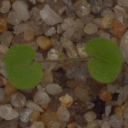

In [5]:
# Viewing an image with cv
cv2_imshow(images[0])

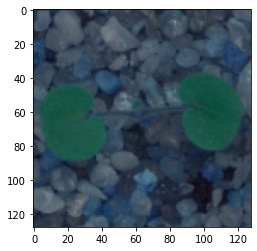

In [6]:
# Viewing an image with matplotlib
plt.imshow(images[0])

There appears to be a color difference within the images. Lets convert the images so that they are all RGB to make interpretation more streamlined.

In [7]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

# <a id= 'link4'>Exploratory Data Analysis</a>

In [8]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

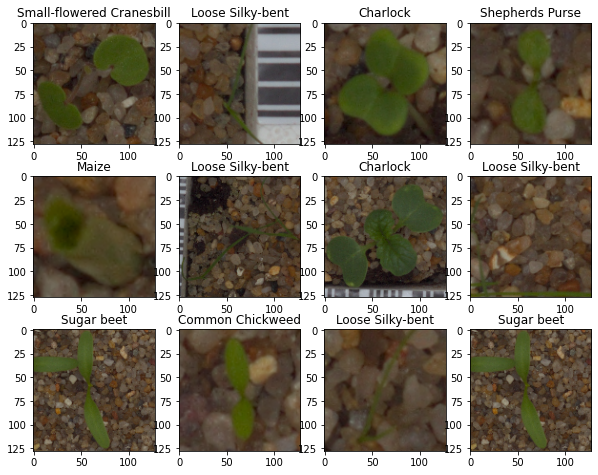

In [9]:
# Viewing random selection of images from the dataset
plot_images(images,labels)

We can see that the labels appear to be correctly matching with the images. There is also a lot of variety in the quality, size, zoom, etc. of each image.

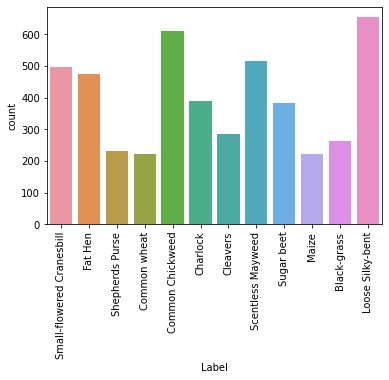

In [10]:
# Checking the balance of the dataset
sns.countplot(data = labels, x = 'Label')
plt.xticks(rotation=90);

There appears to be some significant imbalance in the data set. *Loose Silky-Bent* has over 600 images, while *Common Wheat* only has 200 or so. We'll attempt the to build a base model without altering the current distribution of the data first so that we can see what the baseline performance is first. During the model tuning process we'll check class weights to see if performance can be improved.

# <a id= 'link5'>Data Pre-Processing</a>

## <a id= 'link'>Resizing and Normalizing Images</a>

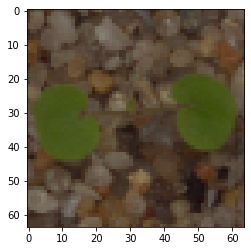

In [11]:
# Resizing images to reduce computational requirements
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)  
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

# Viewing downsized image
plt.imshow(images_decreased[0])

As one might expect, downsizing the image has made it quite grainy. Lets see if Gaussian Blurring helps remove any noise.

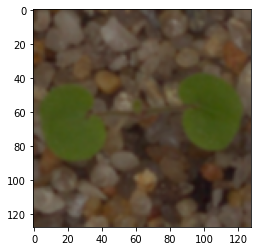

In [12]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))

# Viewing Gaussian Blur Images
plt.imshow(images_gb[0])

Gaussian Blur does not seem to have been an effective trasnformation of the image. In fact, relevant information seems to have actually been removed which will likely make it more difficult for the model to perform well.

## <a id= 'link7'>Preparing the Data</a>

In [13]:
# Splitting the data into Training, Validation, and Testing
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased), 
                                                  labels, 
                                                  test_size=0.2, 
                                                  random_state=1,
                                                  stratify=labels, 
                                                  shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(X_temp, 
                                                  y_temp, 
                                                  test_size=0.3, 
                                                  random_state=1,
                                                  stratify=y_temp, 
                                                  shuffle=True)

# Verifying shape of the data
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(2660, 64, 64, 3) (2660, 1)
(1140, 64, 64, 3) (1140, 1)
(950, 64, 64, 3) (950, 1)


In [14]:
# OHE dataset labels
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded = enc.transform(y_val)
y_test_encoded = enc.transform(y_test)

In [15]:
# Normalizing the image pixel values
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

# <a id= 'link8'>Initial Model Building</a>

Our first base model will be as simple as possible, no batch normalization, spatial dropout, or anything else of that kind will be applied. The number of neurons and other variables such as kernal size will be determined arbitrarily. Once the intial performance baseline is determined, we will attempt to tune these hyperparameters to achieve better performance. 

In [16]:
# Clearing the backend and fixing the seed to make results reproducible
backend.clear_session()
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

We'll build a CNN model with two main sections:
1. *Feature Extraction Layers* via convolutional and pooling layers
2. *Classification Layers* via fully connected layers followed by a softmax activation function

In [17]:
# Intializing a sequential model
model_0 = Sequential()

# Adding the Convolutional and Pooling Layers
model_0.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
model_0.add(MaxPooling2D((2, 2), padding = 'same'))
model_0.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_0.add(MaxPooling2D((2, 2), padding = 'same'))

# Flattening the output of Feature Extraction Layers
model_0.add(Flatten())

# Adding Fully Connected Layers
model_0.add(Dense(64, activation='relu'))
model_0.add(Dense(32, activation='relu'))
model_0.add(Dense(12, activation='softmax'))

# Defining the Optimizer
optimizer = Adam()

# Compile model
model_0.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                5

In [18]:
# Defining Early Stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', 
                                min_delta=0.001, 
                                patience=5)
# Fitting the model
history_0 = model_0.fit(
            X_train_normalized, 
            y_train_encoded,
            epochs=20,
            validation_data=(X_val_normalized, y_val_encoded),
            batch_size=32,
            callbacks = es_cb,
            verbose=2
)

Epoch 1/20
84/84 - 16s - loss: 2.4111 - accuracy: 0.1929 - val_loss: 2.1864 - val_accuracy: 0.3140 - 16s/epoch - 189ms/step
Epoch 2/20
84/84 - 1s - loss: 1.8938 - accuracy: 0.3511 - val_loss: 1.6368 - val_accuracy: 0.4228 - 636ms/epoch - 8ms/step
Epoch 3/20
84/84 - 1s - loss: 1.5279 - accuracy: 0.4680 - val_loss: 1.6227 - val_accuracy: 0.4228 - 642ms/epoch - 8ms/step
Epoch 4/20
84/84 - 1s - loss: 1.3418 - accuracy: 0.5241 - val_loss: 1.5175 - val_accuracy: 0.4737 - 675ms/epoch - 8ms/step
Epoch 5/20
84/84 - 1s - loss: 1.2189 - accuracy: 0.5680 - val_loss: 1.3239 - val_accuracy: 0.5360 - 657ms/epoch - 8ms/step
Epoch 6/20
84/84 - 1s - loss: 1.1594 - accuracy: 0.5925 - val_loss: 1.1408 - val_accuracy: 0.5912 - 781ms/epoch - 9ms/step
Epoch 7/20
84/84 - 1s - loss: 1.0304 - accuracy: 0.6398 - val_loss: 1.1941 - val_accuracy: 0.5877 - 1s/epoch - 13ms/step
Epoch 8/20
84/84 - 1s - loss: 0.9807 - accuracy: 0.6654 - val_loss: 1.0642 - val_accuracy: 0.6351 - 690ms/epoch - 8ms/step
Epoch 9/20
84/84 

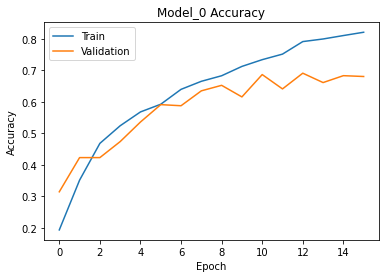

In [19]:
# Visualizing the model performance
plt.plot(history_0.history['accuracy'])
plt.plot(history_0.history['val_accuracy'])
plt.title('Model_0 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

As is typical for neural networks, the model has overfit to the training data. Let's view the classification report.

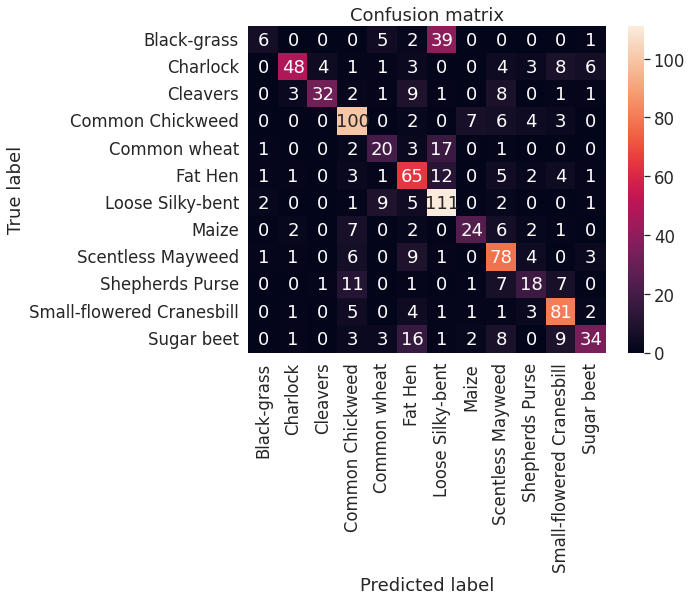

In [20]:
y_pred = model_0.predict(X_test_normalized)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_encoded, axis=1)
confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, 
                                            y_pred=y_pred_labels)

LABELS = np.unique(y_test).astype('str')

plt.figure(figsize=(8, 6))
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

In [21]:
model_0_cr = metrics.classification_report(y_true_labels, y_pred_labels, target_names=LABELS)
print('Model_0 Testing Data Classification Report')
print(model_0_cr)

Model_0 Testing Data Classification Report
                           precision    recall  f1-score   support

              Black-grass       0.55      0.11      0.19        53
                 Charlock       0.84      0.62      0.71        78
                 Cleavers       0.86      0.55      0.67        58
         Common Chickweed       0.71      0.82      0.76       122
             Common wheat       0.50      0.45      0.48        44
                  Fat Hen       0.54      0.68      0.60        95
         Loose Silky-bent       0.61      0.85      0.71       131
                    Maize       0.69      0.55      0.61        44
        Scentless Mayweed       0.62      0.76      0.68       103
          Shepherds Purse       0.50      0.39      0.44        46
Small-flowered Cranesbill       0.71      0.82      0.76        99
               Sugar beet       0.69      0.44      0.54        77

                 accuracy                           0.65       950
                m

- Initial accuracy is 67% on test data. This indicates we have overfit quite heavily since the training data is at almost at 90% accuracy
- The imbalance within the data appears to be having an effect on accuracy. Samples with less representation are performing worse than those with more representation

## <a id= 'link9'>Adding Class Weights</a>

Before attempting to tune other hyperparameters, lets investigate whether using optimal class weights helps with the imbalance within the dataset.

In [22]:
# Determining optimal class weights
from sklearn.utils import class_weight
classes = np.unique(np.argmax(y_train_encoded, axis = 1))
class_weights = class_weight.compute_class_weight('balanced',
                                                 classes = classes,
                                                 y = np.argmax(y_train_encoded, axis = 1))
class_weights = dict(zip(classes, class_weights))
class_weights

{0: 1.507936507936508,
 1: 1.0168195718654434,
 2: 1.3854166666666667,
 3: 0.6481481481481481,
 4: 1.7876344086021505,
 5: 0.8333333333333334,
 6: 0.6056466302367942,
 7: 1.7876344086021505,
 8: 0.7670126874279123,
 9: 1.705128205128205,
 10: 0.7973621103117506,
 11: 1.0262345679012346}

In [23]:
# Clearing the backend and fixing the seed
backend.clear_session()
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Defining Early Stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', 
                                min_delta=0.001, 
                                patience=5)

# Setting new model equal to the base model
model_1 = model_0

# Fitting the model
history_1 = model_1.fit(
            X_train_normalized, 
            y_train_encoded,
            epochs=20,
            validation_data=(X_val_normalized, y_val_encoded),
            batch_size=32,
            class_weight = class_weights,
            callbacks = es_cb,
            verbose=2
)

Epoch 1/20
84/84 - 24s - loss: 0.3507 - accuracy: 0.8880 - val_loss: 1.1812 - val_accuracy: 0.6404 - 24s/epoch - 287ms/step
Epoch 2/20
84/84 - 23s - loss: 0.2979 - accuracy: 0.9075 - val_loss: 1.2441 - val_accuracy: 0.6351 - 23s/epoch - 276ms/step
Epoch 3/20
84/84 - 25s - loss: 0.2715 - accuracy: 0.9113 - val_loss: 1.4540 - val_accuracy: 0.6140 - 25s/epoch - 297ms/step
Epoch 4/20
84/84 - 23s - loss: 0.2517 - accuracy: 0.9207 - val_loss: 1.3357 - val_accuracy: 0.6553 - 23s/epoch - 278ms/step
Epoch 5/20
84/84 - 23s - loss: 0.1947 - accuracy: 0.9417 - val_loss: 1.4302 - val_accuracy: 0.6474 - 23s/epoch - 273ms/step
Epoch 6/20
84/84 - 23s - loss: 0.1858 - accuracy: 0.9462 - val_loss: 1.5798 - val_accuracy: 0.6298 - 23s/epoch - 274ms/step
Epoch 7/20
84/84 - 24s - loss: 0.2066 - accuracy: 0.9263 - val_loss: 1.5349 - val_accuracy: 0.6289 - 24s/epoch - 285ms/step
Epoch 8/20
84/84 - 27s - loss: 0.1526 - accuracy: 0.9545 - val_loss: 1.5013 - val_accuracy: 0.6570 - 27s/epoch - 317ms/step
Epoch 9/

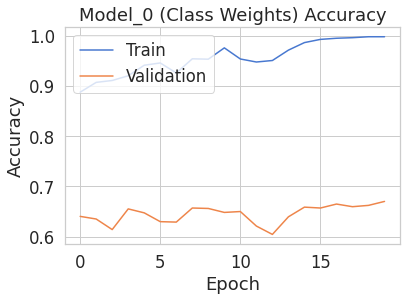

In [ ]:
# Visualizing the model performance
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model_1 (Class Weights) Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

With training data at almost 100% accuracy and validation barely at 70%, this is an blatant overfitting.

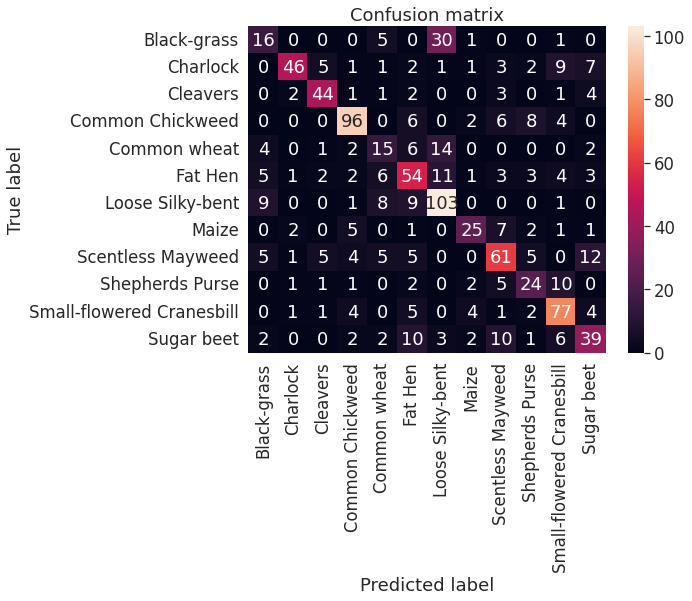

In [ ]:
y_pred = model_1.predict(X_test_normalized)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_encoded, axis=1)
confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, 
                                            y_pred=y_pred_labels)

LABELS = np.unique(y_test).astype('str')

plt.figure(figsize=(8, 6))
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

In [ ]:
model_1_cr = metrics.classification_report(y_true_labels, y_pred_labels, target_names=LABELS)
print('Model_1 Testing Data Classification Report')
print(model_1_cr)

Model_0 Testing Data with Class Weights Classification Report
                           precision    recall  f1-score   support

              Black-grass       0.39      0.30      0.34        53
                 Charlock       0.85      0.59      0.70        78
                 Cleavers       0.75      0.76      0.75        58
         Common Chickweed       0.81      0.79      0.80       122
             Common wheat       0.35      0.34      0.34        44
                  Fat Hen       0.53      0.57      0.55        95
         Loose Silky-bent       0.64      0.79      0.70       131
                    Maize       0.66      0.57      0.61        44
        Scentless Mayweed       0.62      0.59      0.60       103
          Shepherds Purse       0.51      0.52      0.52        46
Small-flowered Cranesbill       0.68      0.78      0.72        99
               Sugar beet       0.54      0.51      0.52        77

                 accuracy                           0.63       95

Testing accuracy has decreased from 67% to 63%, further confirming the extreme overfitting present in the model. However, the class weights do seem to have helped with the data imbalance.

# <a id= 'link10'>Model Tuning</a>

## <a id= 'link11'>Data Augmentation</a>

Lets see if we can help reduce the overfitting by augmenting the images present in our dataset.

In [24]:
# Augmenting ONLY the training data 
# No rescaling necessary since we already normalized the data
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                   vertical_flip = True, 
                                   height_shift_range= 0.2, 
                                   width_shift_range=0.2, 
                                   rotation_range=90, 
                                   shear_range = 0.2, 
                                   zoom_range=0.2)

In [25]:
# Clearing the backend and fixing the seed
backend.clear_session()
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Defining Early Stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', 
                                min_delta=0.001, 
                                patience=5)

# Setting new model equal to the base model
model_2 = model_0

# Fitting the model
history_2 = model_2.fit(train_datagen.flow(X_train_normalized, 
                                           y_train_encoded,
                                           batch_size = 64,
                                           seed = 1,
                                           shuffle = False), 
                        epochs = 20, 
                        validation_data=(X_val_normalized, 
                                         y_val_encoded), 
                        batch_size=32, 
                        class_weight = class_weights,
                        callbacks = es_cb, 
                        verbose=2)

Epoch 1/20
42/42 - 35s - loss: 2.4870 - accuracy: 0.0688 - val_loss: 2.4832 - val_accuracy: 0.0465 - 35s/epoch - 841ms/step
Epoch 2/20
42/42 - 41s - loss: 2.4716 - accuracy: 0.0538 - val_loss: 2.4435 - val_accuracy: 0.0921 - 41s/epoch - 981ms/step
Epoch 3/20
42/42 - 27s - loss: 2.3422 - accuracy: 0.1102 - val_loss: 2.1597 - val_accuracy: 0.2035 - 27s/epoch - 644ms/step
Epoch 4/20
42/42 - 25s - loss: 2.0751 - accuracy: 0.1932 - val_loss: 2.0310 - val_accuracy: 0.2167 - 25s/epoch - 592ms/step
Epoch 5/20
42/42 - 26s - loss: 1.9908 - accuracy: 0.2372 - val_loss: 1.8626 - val_accuracy: 0.2535 - 26s/epoch - 610ms/step
Epoch 6/20
42/42 - 27s - loss: 1.9304 - accuracy: 0.2519 - val_loss: 1.8446 - val_accuracy: 0.2798 - 27s/epoch - 641ms/step
Epoch 7/20
42/42 - 25s - loss: 1.8898 - accuracy: 0.2789 - val_loss: 1.8320 - val_accuracy: 0.3079 - 25s/epoch - 592ms/step
Epoch 8/20
42/42 - 26s - loss: 1.8508 - accuracy: 0.2801 - val_loss: 1.7946 - val_accuracy: 0.3149 - 26s/epoch - 610ms/step
Epoch 9/

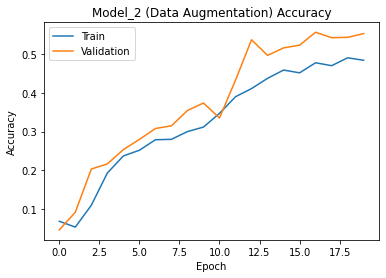

In [ ]:
# Visualizing the model performance
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model_2 (Data Augmentation) Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

The training and validation did not converge and are still showing signs of increasing in accuracy. This indicates that the model has room for improvement by either increasing the batch size during training, or increasing the total number of epochs. There doesn't appear to be an overfitting present as of yet.

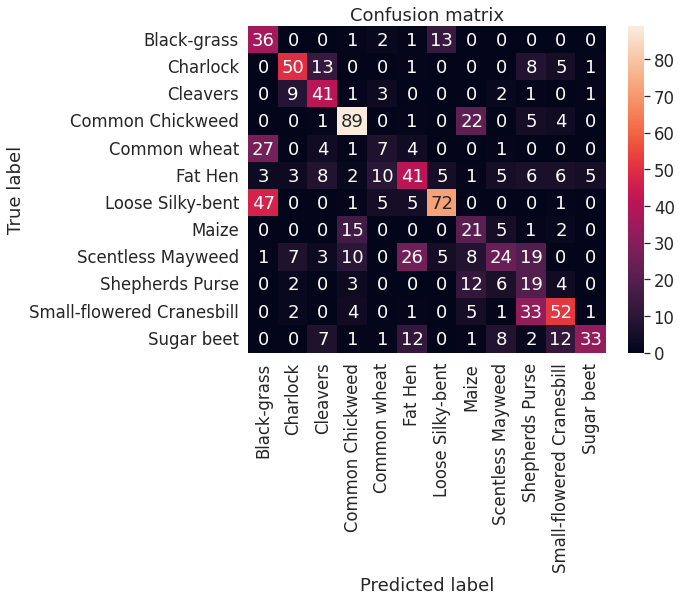

In [ ]:
y_pred = model_2.predict(X_test_normalized)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_encoded, axis=1)
confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, 
                                            y_pred=y_pred_labels)

LABELS = np.unique(y_test).astype('str')

plt.figure(figsize=(8, 6))
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

In [ ]:
model_2_cr = metrics.classification_report(y_true_labels, y_pred_labels, target_names=LABELS)
print('Model_2 Testing Data Classification Report')
print(model_2_cr)

Model_2 Testing Data Classification Report
                           precision    recall  f1-score   support

              Black-grass       0.32      0.68      0.43        53
                 Charlock       0.68      0.64      0.66        78
                 Cleavers       0.53      0.71      0.61        58
         Common Chickweed       0.70      0.73      0.71       122
             Common wheat       0.25      0.16      0.19        44
                  Fat Hen       0.45      0.43      0.44        95
         Loose Silky-bent       0.76      0.55      0.64       131
                    Maize       0.30      0.48      0.37        44
        Scentless Mayweed       0.46      0.23      0.31       103
          Shepherds Purse       0.20      0.41      0.27        46
Small-flowered Cranesbill       0.60      0.53      0.56        99
               Sugar beet       0.80      0.43      0.56        77

                 accuracy                           0.51       950
                m

The model is performing quite poorly but all metrics for accuracy across training, validation, and testing are matchine each other closesly. This indicates that we have underfit. Lets see if transfer learning gives us a better outcome.

## <a id= 'link12'>Transfer Learning</a>

For our own CNN we reduced the image size to reduce the computational requirements. Due to the nature of transfer learning however, we'll go back and use the original resolution as this is no longer a concern.

In [26]:
# Splitting the data into Training, Validation, and Testing
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images), 
                                                  labels, 
                                                  test_size=0.2, 
                                                  random_state=1,
                                                  stratify=labels, 
                                                  shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(X_temp, 
                                                  y_temp, 
                                                  test_size=0.3, 
                                                  random_state=1,
                                                  stratify=y_temp, 
                                                  shuffle=True)

# Verifying shape of the data
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(2660, 128, 128, 3) (2660, 1)
(1140, 128, 128, 3) (1140, 1)
(950, 128, 128, 3) (950, 1)


In [27]:
# OHE dataset labels
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded = enc.transform(y_val)
y_test_encoded = enc.transform(y_test)

In [28]:
# Normalizing the image pixel values
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

In [29]:
# Importing VGG16 as our transfer learning model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (128, 128,3))
vgg_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [30]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [31]:
# Clearing the backend and fixing the seed
backend.clear_session()
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [32]:
model_3 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_3.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_3.add(Flatten())

# Adding a dense output layer
# Increasing neurons and adding dropout to capture additional info from VGG16
model_3.add(Dense(256, activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(256, activation='relu'))
model_3.add(Dense(12, activation='softmax'))

# Defining the optimizer
optimizer = Adam()

# Compile the model
model_3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 12)                3084      
                                                                 
Total params: 16,880,972
Trainable params: 2,166,284
Non

In [ ]:
# Defining Early Stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', 
                                min_delta=0.001, 
                                patience=10)

# Fitting the model
history_3 = model_3.fit(train_datagen.flow(X_train_normalized, 
                                           y_train_encoded,
                                           batch_size = 64,
                                           seed = 1,
                                           shuffle = False), 
                        epochs = 100, 
                        validation_data=(X_val_normalized, 
                                         y_val_encoded), 
                        class_weight = class_weights,
                        batch_size = 64,
                        callbacks = es_cb, 
                        verbose=2)

Epoch 1/100
42/42 - 28s - loss: 2.2731 - accuracy: 0.2026 - val_loss: 1.9773 - val_accuracy: 0.2860 - 28s/epoch - 664ms/step
Epoch 2/100
42/42 - 14s - loss: 1.8377 - accuracy: 0.3395 - val_loss: 1.6041 - val_accuracy: 0.4439 - 14s/epoch - 329ms/step
Epoch 3/100
42/42 - 14s - loss: 1.7005 - accuracy: 0.3793 - val_loss: 1.6156 - val_accuracy: 0.4281 - 14s/epoch - 337ms/step
Epoch 4/100
42/42 - 13s - loss: 1.5964 - accuracy: 0.4184 - val_loss: 1.4032 - val_accuracy: 0.4798 - 13s/epoch - 318ms/step
Epoch 5/100
42/42 - 12s - loss: 1.4956 - accuracy: 0.4568 - val_loss: 1.3228 - val_accuracy: 0.5263 - 12s/epoch - 285ms/step
Epoch 6/100
42/42 - 12s - loss: 1.4224 - accuracy: 0.4729 - val_loss: 1.2486 - val_accuracy: 0.5439 - 12s/epoch - 286ms/step
Epoch 7/100
42/42 - 12s - loss: 1.3720 - accuracy: 0.4970 - val_loss: 1.1656 - val_accuracy: 0.5833 - 12s/epoch - 282ms/step
Epoch 8/100
42/42 - 12s - loss: 1.3498 - accuracy: 0.5316 - val_loss: 1.2815 - val_accuracy: 0.5491 - 12s/epoch - 282ms/step


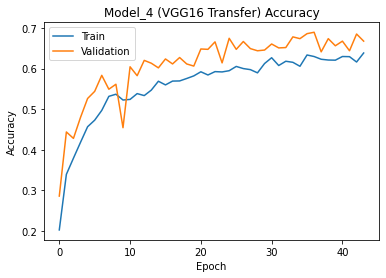

In [ ]:
# Visualizing the model performance
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model_3 (VGG16 Transfer) Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Suprisingly, the validation data is out performing the training data consistently. This is a good indication that the model is generalizing well. Overall, the model seems to have improved upon the previous iterations.

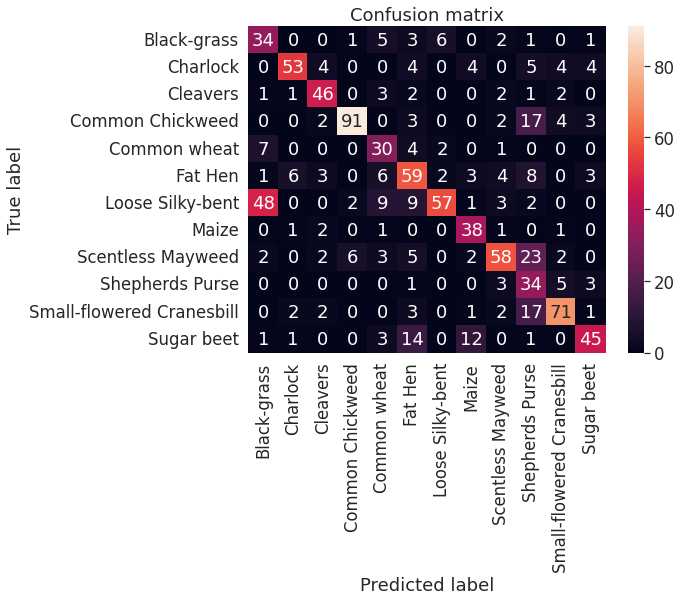

In [ ]:
y_pred = model_3.predict(X_test_normalized)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_encoded, axis=1)
confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, 
                                            y_pred=y_pred_labels)

LABELS = np.unique(y_test).astype('str')

plt.figure(figsize=(8, 6))
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

*Loose Silky-bent* is the most misclassified plant within the dataset and is most often confused for *Black-grass*

In [ ]:
model_3_cr = metrics.classification_report(y_true_labels, y_pred_labels, target_names=LABELS)
print('Model_3 Testing Data Classification Report')
print(model_3_cr)

Model_4 Testing Data Classification Report
                           precision    recall  f1-score   support

              Black-grass       0.36      0.64      0.46        53
                 Charlock       0.83      0.68      0.75        78
                 Cleavers       0.75      0.79      0.77        58
         Common Chickweed       0.91      0.75      0.82       122
             Common wheat       0.50      0.68      0.58        44
                  Fat Hen       0.55      0.62      0.58        95
         Loose Silky-bent       0.85      0.44      0.58       131
                    Maize       0.62      0.86      0.72        44
        Scentless Mayweed       0.74      0.56      0.64       103
          Shepherds Purse       0.31      0.74      0.44        46
Small-flowered Cranesbill       0.80      0.72      0.76        99
               Sugar beet       0.75      0.58      0.66        77

                 accuracy                           0.65       950
                m

In terms of accuracy, the testing data has outperformed our training data by 10% and has improved on the base model by 5%. With the exception of the *Loose Silky-bent* class, the model is performing well.

### <a id= 'link13'>InceptionV3</a>

Lets see if we can achieve a better performance with a different transfer learning model.

In [33]:
# Importing InceptionV3 as our transfer learning model
from keras.applications.inception_v3 import InceptionV3

In [34]:
iv3_model = InceptionV3(weights='imagenet', include_top = False, input_shape = (128, 128, 3))
# Summary not included due to length

# Freezing the layers in iv3_model
for layer in iv3_model.layers:
    layer.trainable = False

87924736/87910968 [==============================] - 0s 0us/step


In [35]:
# Clearing the backend and fixing the seed
backend.clear_session()
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Initializing the model
model_4 = Sequential()

# Adding the convolutional part of the iv3_model from above
model_4.add(iv3_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_4.add(Flatten())

# Adding a dense layers with dropout
model_4.add(Dense(256, activation='relu'))
model_4.add(Dropout(0.2))
model_4.add(Dense(256, activation='relu'))
model_4.add(Dense(12, activation='softmax'))

# Defining the optimizer
optimizer = Adam()

# Compile the model
model_4.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 12)                3084      
                                                                 
Total params: 23,969,068
Trainable params: 2,166,284
Non

We've added about 7 million parameters with this transfer model. The trainable parameters in the classification layers remains the same.

In [ ]:
# Defining Early Stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', 
                                min_delta=0.001, 
                                patience=10)

# Fitting the model
history_4 = model_4.fit(train_datagen.flow(X_train_normalized, 
                                           y_train_encoded,
                                           batch_size = 64,
                                           seed = 1,
                                           shuffle = False), 
                        epochs = 100,
                        validation_data=(X_val_normalized, 
                                         y_val_encoded), 
                        class_weight = class_weights,
                        batch_size = 64,
                        callbacks = es_cb, 
                        verbose=2)

Epoch 1/100
42/42 - 21s - loss: 2.9027 - accuracy: 0.1485 - val_loss: 2.2520 - val_accuracy: 0.2482 - 21s/epoch - 507ms/step
Epoch 2/100
42/42 - 11s - loss: 2.1818 - accuracy: 0.2271 - val_loss: 1.8410 - val_accuracy: 0.3754 - 11s/epoch - 270ms/step
Epoch 3/100
42/42 - 11s - loss: 2.0290 - accuracy: 0.2620 - val_loss: 1.7821 - val_accuracy: 0.3825 - 11s/epoch - 251ms/step
Epoch 4/100
42/42 - 11s - loss: 1.9403 - accuracy: 0.2876 - val_loss: 1.7128 - val_accuracy: 0.3754 - 11s/epoch - 253ms/step
Epoch 5/100
42/42 - 10s - loss: 1.8967 - accuracy: 0.3071 - val_loss: 1.5603 - val_accuracy: 0.4526 - 10s/epoch - 249ms/step
Epoch 6/100
42/42 - 12s - loss: 1.7992 - accuracy: 0.3293 - val_loss: 1.5884 - val_accuracy: 0.4333 - 12s/epoch - 289ms/step
Epoch 7/100
42/42 - 10s - loss: 1.7995 - accuracy: 0.3342 - val_loss: 1.5506 - val_accuracy: 0.4772 - 10s/epoch - 249ms/step
Epoch 8/100
42/42 - 11s - loss: 1.7299 - accuracy: 0.3624 - val_loss: 1.4344 - val_accuracy: 0.5079 - 11s/epoch - 252ms/step


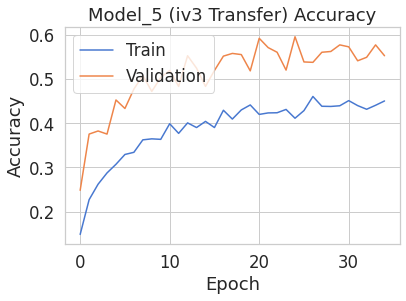

In [ ]:
# Visualizing the model performance
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model_4 (iv3 Transfer) Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

The validation is outperforming the model by 10%, a fairly significant increase from the vgg16 transfer model.

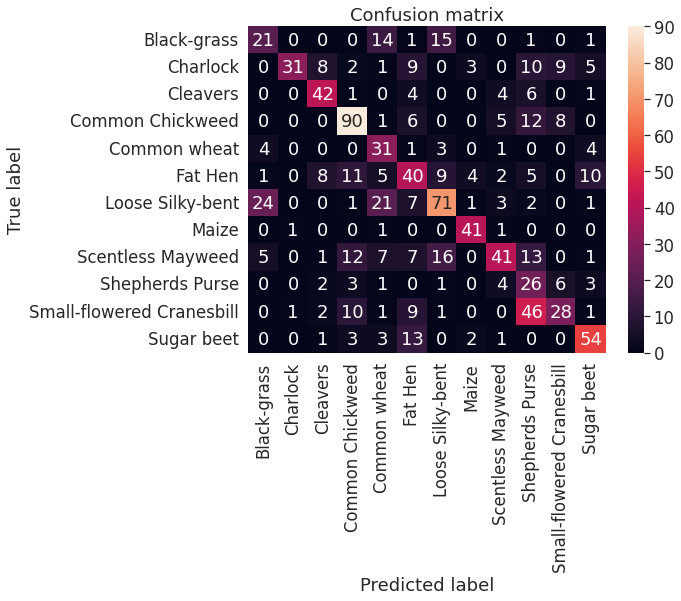

In [ ]:
y_pred = model_4.predict(X_test_normalized)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_encoded, axis=1)
confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, 
                                            y_pred=y_pred_labels)

LABELS = np.unique(y_test).astype('str')

plt.figure(figsize=(8, 6))
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

In [ ]:
model_4_cr = metrics.classification_report(y_true_labels, y_pred_labels, target_names=LABELS)
print('Model_4 Testing Data Classification Report')
print(model_4_cr)

Model_5 Testing Data Classification Report
                           precision    recall  f1-score   support

              Black-grass       0.38      0.40      0.39        53
                 Charlock       0.94      0.40      0.56        78
                 Cleavers       0.66      0.72      0.69        58
         Common Chickweed       0.68      0.74      0.71       122
             Common wheat       0.36      0.70      0.48        44
                  Fat Hen       0.41      0.42      0.42        95
         Loose Silky-bent       0.61      0.54      0.57       131
                    Maize       0.80      0.93      0.86        44
        Scentless Mayweed       0.66      0.40      0.50       103
          Shepherds Purse       0.21      0.57      0.31        46
Small-flowered Cranesbill       0.55      0.28      0.37        99
               Sugar beet       0.67      0.70      0.68        77

                 accuracy                           0.54       950
                m

The InceptionV3 transfer model is performing worse than our base model. Out of curiosity, lets test the VGG16 and InceptionV3 again, but this time *without* the class weights.

### <a id= 'link14'>Removing the Class Weights</a>

In [36]:
# Clearing the backend and fixing the seed
backend.clear_session()
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Defining Early Stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', 
                                min_delta=0.001, 
                                patience=10)

# Copying and renaming the model
model_5 = model_3

# Fitting the model
history_5 = model_5.fit(train_datagen.flow(X_train_normalized, 
                                           y_train_encoded,
                                           batch_size = 64,
                                           seed = 1,
                                           shuffle = False), 
                        epochs = 100, 
                        validation_data=(X_val_normalized, 
                                         y_val_encoded),
                        batch_size = 64,
                        callbacks = es_cb, 
                        verbose=2)

Epoch 1/100
42/42 - 20s - loss: 2.1687 - accuracy: 0.2526 - val_loss: 1.8311 - val_accuracy: 0.3553 - 20s/epoch - 465ms/step
Epoch 2/100
42/42 - 12s - loss: 1.7787 - accuracy: 0.3756 - val_loss: 1.5684 - val_accuracy: 0.4395 - 12s/epoch - 286ms/step
Epoch 3/100
42/42 - 12s - loss: 1.6225 - accuracy: 0.4297 - val_loss: 1.4877 - val_accuracy: 0.4860 - 12s/epoch - 286ms/step
Epoch 4/100
42/42 - 12s - loss: 1.5349 - accuracy: 0.4613 - val_loss: 1.2996 - val_accuracy: 0.5421 - 12s/epoch - 282ms/step
Epoch 5/100
42/42 - 12s - loss: 1.4261 - accuracy: 0.4955 - val_loss: 1.2656 - val_accuracy: 0.5526 - 12s/epoch - 283ms/step
Epoch 6/100
42/42 - 12s - loss: 1.3719 - accuracy: 0.5109 - val_loss: 1.1499 - val_accuracy: 0.6114 - 12s/epoch - 283ms/step
Epoch 7/100
42/42 - 12s - loss: 1.3115 - accuracy: 0.5432 - val_loss: 1.0955 - val_accuracy: 0.6149 - 12s/epoch - 284ms/step
Epoch 8/100
42/42 - 13s - loss: 1.2636 - accuracy: 0.5613 - val_loss: 1.1415 - val_accuracy: 0.6026 - 13s/epoch - 299ms/step


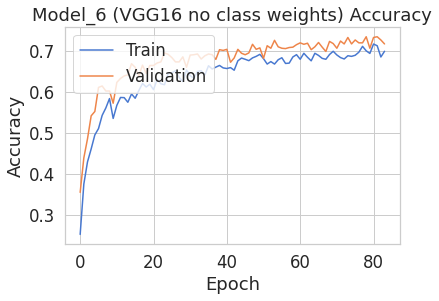

In [ ]:
# Visualizing the model performance
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('Model_5 (VGG16 no class weights) Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Removing the weights on the VGG16 model appears to have marginally improved performance.

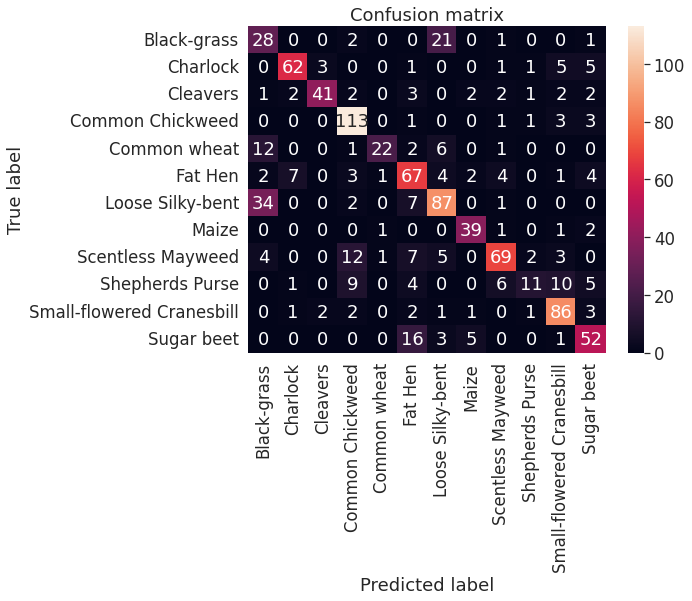

In [ ]:
y_pred = model_5.predict(X_test_normalized)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_encoded, axis=1)
confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, 
                                            y_pred=y_pred_labels)

LABELS = np.unique(y_test).astype('str')

plt.figure(figsize=(8, 6))
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

In [ ]:
model_5_cr = metrics.classification_report(y_true_labels, y_pred_labels, target_names=LABELS)
print('Model_5 Testing Data Classification Report')
print(model_5_cr)

Model_5 Testing Data Classification Report
                           precision    recall  f1-score   support

              Black-grass       0.35      0.53      0.42        53
                 Charlock       0.85      0.79      0.82        78
                 Cleavers       0.89      0.71      0.79        58
         Common Chickweed       0.77      0.93      0.84       122
             Common wheat       0.88      0.50      0.64        44
                  Fat Hen       0.61      0.71      0.65        95
         Loose Silky-bent       0.69      0.66      0.67       131
                    Maize       0.80      0.89      0.84        44
        Scentless Mayweed       0.79      0.67      0.73       103
          Shepherds Purse       0.65      0.24      0.35        46
Small-flowered Cranesbill       0.77      0.87      0.82        99
               Sugar beet       0.68      0.68      0.68        77

                 accuracy                           0.71       950
                m

Testing perfromance has increased by 1%. However, this model appears to be far more consistent across the different datasets and thus appears to be much more consistent in its generalization.

In [37]:
# Clearing the backend and fixing the seed
backend.clear_session()
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Defining Early Stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', 
                                min_delta=0.001, 
                                patience=10)

# Copying the model and renaming it
model_6 = model_4

# Fitting the model
history_6 = model_6.fit(train_datagen.flow(X_train_normalized, 
                                           y_train_encoded,
                                           batch_size = 64,
                                           seed = 1,
                                           shuffle = False), 
                        epochs = 100, 
                        validation_data=(X_val_normalized, 
                                         y_val_encoded),
                        batch_size = 64,
                        callbacks = es_cb, 
                        verbose=2)

Epoch 1/100
42/42 - 16s - loss: 3.3702 - accuracy: 0.1793 - val_loss: 2.0236 - val_accuracy: 0.3254 - 16s/epoch - 386ms/step
Epoch 2/100
42/42 - 11s - loss: 1.9961 - accuracy: 0.3124 - val_loss: 1.7825 - val_accuracy: 0.4149 - 11s/epoch - 251ms/step
Epoch 3/100
42/42 - 10s - loss: 1.9207 - accuracy: 0.3271 - val_loss: 1.6791 - val_accuracy: 0.3991 - 10s/epoch - 249ms/step
Epoch 4/100
42/42 - 11s - loss: 1.8317 - accuracy: 0.3519 - val_loss: 1.5520 - val_accuracy: 0.4737 - 11s/epoch - 257ms/step
Epoch 5/100
42/42 - 10s - loss: 1.7426 - accuracy: 0.3842 - val_loss: 1.5049 - val_accuracy: 0.4719 - 10s/epoch - 249ms/step
Epoch 6/100
42/42 - 11s - loss: 1.7055 - accuracy: 0.3959 - val_loss: 1.4247 - val_accuracy: 0.5018 - 11s/epoch - 255ms/step
Epoch 7/100
42/42 - 10s - loss: 1.6783 - accuracy: 0.4109 - val_loss: 1.4058 - val_accuracy: 0.5263 - 10s/epoch - 249ms/step
Epoch 8/100
42/42 - 11s - loss: 1.6316 - accuracy: 0.4139 - val_loss: 1.4225 - val_accuracy: 0.5307 - 11s/epoch - 262ms/step


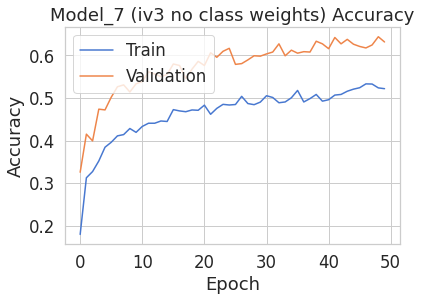

In [ ]:
# Visualizing the model performance
plt.plot(history_6.history['accuracy'])
plt.plot(history_6.history['val_accuracy'])
plt.title('Model_6 (iv3 no class weights) Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

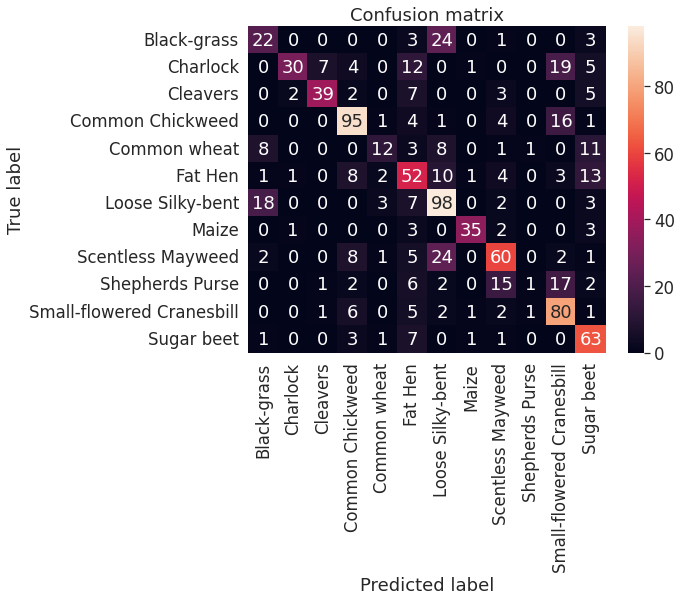

In [ ]:
y_pred = model_6.predict(X_test_normalized)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_encoded, axis=1)
confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, 
                                            y_pred=y_pred_labels)

LABELS = np.unique(y_test).astype('str')

plt.figure(figsize=(8, 6))
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

In [ ]:
model_6_cr = metrics.classification_report(y_true_labels, y_pred_labels, target_names=LABELS)
print('Model_6 Testing Data Classification Report')
print(model_6_cr)

Model_7 Testing Data Classification Report
                           precision    recall  f1-score   support

              Black-grass       0.42      0.42      0.42        53
                 Charlock       0.88      0.38      0.54        78
                 Cleavers       0.81      0.67      0.74        58
         Common Chickweed       0.74      0.78      0.76       122
             Common wheat       0.60      0.27      0.37        44
                  Fat Hen       0.46      0.55      0.50        95
         Loose Silky-bent       0.58      0.75      0.65       131
                    Maize       0.90      0.80      0.84        44
        Scentless Mayweed       0.63      0.58      0.61       103
          Shepherds Purse       0.33      0.02      0.04        46
Small-flowered Cranesbill       0.58      0.81      0.68        99
               Sugar beet       0.57      0.82      0.67        77

                 accuracy                           0.62       950
                m

The InceptionV3 model without class weights failed to improve upon the base model. However, in comparison to the model with class weights, accuracy increased 3%.

### <a id= 'link15'>Decreasing the Data Augmentation</a>

Because we managed to increase performance by removing the class weights, it stands to reason that we may have been restricting the model too much. Lets see if we can get better results by pulling back on the amount of data augmentation we perfrom on the testing data.

In [38]:
# Clearing the backend and fixing the seed
backend.clear_session()
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [39]:
# Reducing the amount of augmentation performed on the training data
train_datagen_2 = ImageDataGenerator(horizontal_flip = True, 
                                   vertical_flip = True, 
                                   height_shift_range= 0.1, 
                                   width_shift_range=0.1, 
                                   rotation_range= 30, 
                                   shear_range = 0.1, 
                                   zoom_range=0.1)

In [ ]:
# Defining Early Stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', 
                                min_delta=0.001, 
                                patience=10)

# Copying and renaming the model
model_7 = model_3

# Fitting the model
history_7 = model_7.fit(train_datagen_2.flow(X_train_normalized, 
                                           y_train_encoded,
                                           batch_size = 64,
                                           seed = 1,
                                           shuffle = False), 
                        epochs = 100, 
                        validation_data=(X_val_normalized, 
                                         y_val_encoded),
                        batch_size = 64,
                        callbacks = es_cb, 
                        verbose=2)

Epoch 1/100
42/42 - 14s - loss: 1.4201 - accuracy: 0.5425 - val_loss: 1.0006 - val_accuracy: 0.6474 - 14s/epoch - 328ms/step
Epoch 2/100
42/42 - 12s - loss: 1.1656 - accuracy: 0.5868 - val_loss: 0.9729 - val_accuracy: 0.6684 - 12s/epoch - 282ms/step
Epoch 3/100
42/42 - 12s - loss: 1.1243 - accuracy: 0.6034 - val_loss: 0.9867 - val_accuracy: 0.6482 - 12s/epoch - 283ms/step
Epoch 4/100
42/42 - 12s - loss: 1.0483 - accuracy: 0.6346 - val_loss: 0.8612 - val_accuracy: 0.7061 - 12s/epoch - 280ms/step
Epoch 5/100
42/42 - 12s - loss: 0.9910 - accuracy: 0.6500 - val_loss: 0.8052 - val_accuracy: 0.7184 - 12s/epoch - 282ms/step
Epoch 6/100
42/42 - 16s - loss: 0.9505 - accuracy: 0.6669 - val_loss: 0.8509 - val_accuracy: 0.7000 - 16s/epoch - 376ms/step
Epoch 7/100
42/42 - 12s - loss: 0.9694 - accuracy: 0.6541 - val_loss: 0.8280 - val_accuracy: 0.7079 - 12s/epoch - 279ms/step
Epoch 8/100
42/42 - 17s - loss: 0.9251 - accuracy: 0.6808 - val_loss: 0.8654 - val_accuracy: 0.6842 - 17s/epoch - 396ms/step


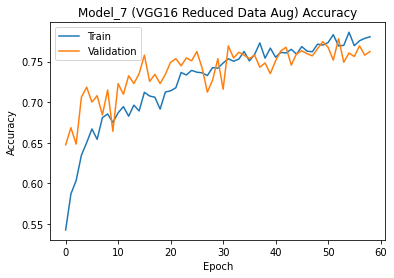

In [ ]:
# Visualizing the model performance
plt.plot(history_7.history['accuracy'])
plt.plot(history_7.history['val_accuracy'])
plt.title('Model_7 (VGG16 Reduced Data Aug) Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Peformance on the model is quite good now. This is a significant improvement over the previous iterations.

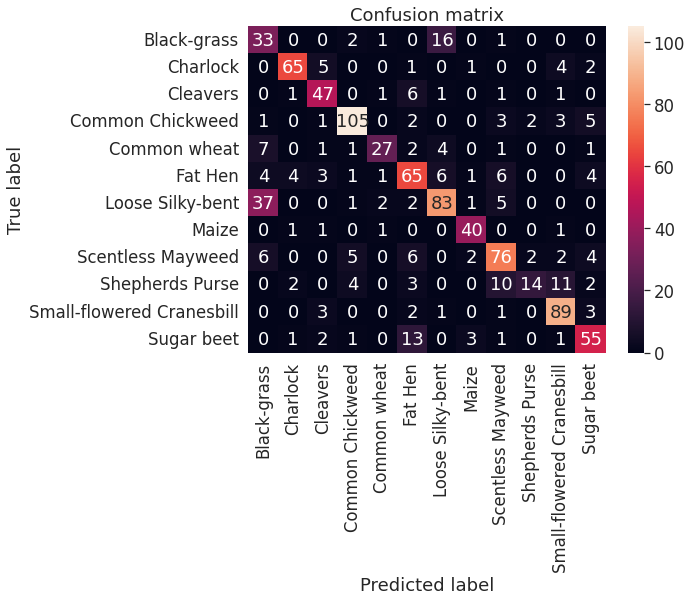

In [ ]:
y_pred = model_7.predict(X_test_normalized)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_encoded, axis=1)
confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, 
                                            y_pred=y_pred_labels)

LABELS = np.unique(y_test).astype('str')

plt.figure(figsize=(8, 6))
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

In [ ]:
model_7_cr = metrics.classification_report(y_true_labels, y_pred_labels, target_names=LABELS)
print('Model_7 Testing Data Classification Report')
print(model_7_cr)

Model_7 Testing Data Classification Report
                           precision    recall  f1-score   support

              Black-grass       0.38      0.62      0.47        53
                 Charlock       0.88      0.83      0.86        78
                 Cleavers       0.75      0.81      0.78        58
         Common Chickweed       0.88      0.86      0.87       122
             Common wheat       0.82      0.61      0.70        44
                  Fat Hen       0.64      0.68      0.66        95
         Loose Silky-bent       0.75      0.63      0.69       131
                    Maize       0.83      0.91      0.87        44
        Scentless Mayweed       0.72      0.74      0.73       103
          Shepherds Purse       0.78      0.30      0.44        46
Small-flowered Cranesbill       0.79      0.90      0.84        99
               Sugar beet       0.72      0.71      0.72        77

                 accuracy                           0.74       950
                m

By reducing the amount of data augmentation we've achieved our highest accuracy yet! Let's test one last model to see if things can be improved further.

In [40]:
# Clearing the backend and fixing the seed
backend.clear_session()
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [41]:
# Reducing the amount of data augmentation for a second time
train_datagen_3 = ImageDataGenerator(vertical_flip = True, 
                                   height_shift_range= 0.1, 
                                   width_shift_range=0.1, 
                                   rotation_range= 10,  
                                   zoom_range=0.1)
                                   

In [ ]:
# Defining Early Stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', 
                                min_delta=0.01, 
                                patience=5)

# Copying and renaming the model
model_8 = model_3

# Fitting the model
history_8 = model_8.fit(train_datagen_3.flow(X_train_normalized, 
                                           y_train_encoded,
                                           batch_size = 64,
                                           seed = 1,
                                           shuffle = False), 
                        epochs = 20, 
                        validation_data=(X_val_normalized, 
                                         y_val_encoded),
                        batch_size = 64,
                        callbacks = es_cb, 
                        verbose=2)

Epoch 1/20
42/42 - 14s - loss: 0.5361 - accuracy: 0.8026 - val_loss: 0.6534 - val_accuracy: 0.7816 - 14s/epoch - 322ms/step
Epoch 2/20
42/42 - 12s - loss: 0.5010 - accuracy: 0.8188 - val_loss: 0.7108 - val_accuracy: 0.7754 - 12s/epoch - 282ms/step
Epoch 3/20
42/42 - 12s - loss: 0.5230 - accuracy: 0.8071 - val_loss: 0.6863 - val_accuracy: 0.7754 - 12s/epoch - 280ms/step
Epoch 4/20
42/42 - 12s - loss: 0.5117 - accuracy: 0.8169 - val_loss: 0.7110 - val_accuracy: 0.7667 - 12s/epoch - 278ms/step
Epoch 5/20
42/42 - 12s - loss: 0.4895 - accuracy: 0.8218 - val_loss: 0.7303 - val_accuracy: 0.7675 - 12s/epoch - 277ms/step
Epoch 6/20
42/42 - 12s - loss: 0.5064 - accuracy: 0.8154 - val_loss: 0.7864 - val_accuracy: 0.7737 - 12s/epoch - 278ms/step


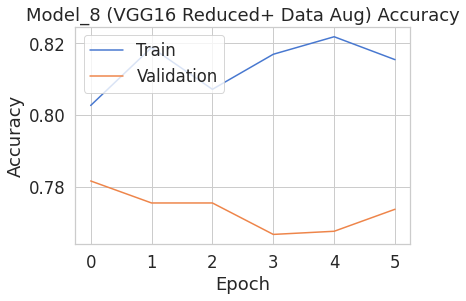

In [ ]:
# Visualizing the model performance
plt.plot(history_8.history['accuracy'])
plt.plot(history_8.history['val_accuracy'])
plt.title('Model_8 (VGG16 Reduced+ Data Aug) Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Peformance on the model is quite good now, was achieved in far less time than other models, and is a significant improvement over the previous iterations. However, there *may* be a slight overfit.

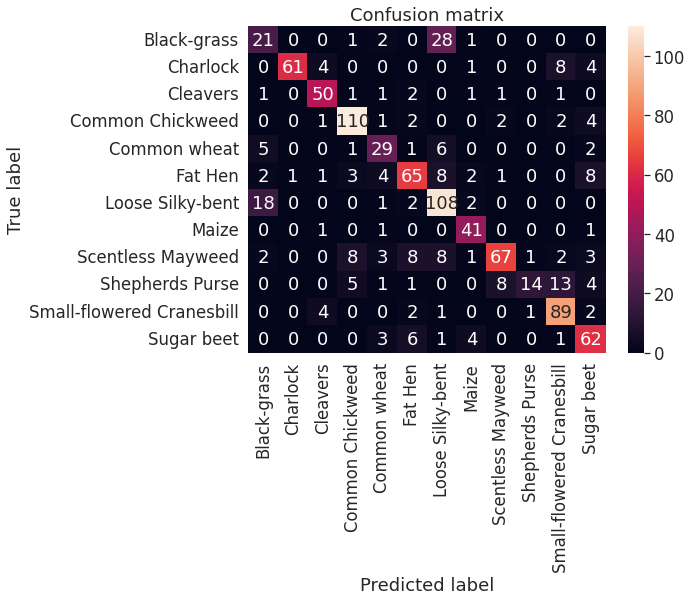

In [ ]:
y_pred = model_8.predict(X_test_normalized)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_encoded, axis=1)
confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, 
                                            y_pred=y_pred_labels)

LABELS = np.unique(y_test).astype('str')

plt.figure(figsize=(8, 6))
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

In [ ]:
model_8_cr = metrics.classification_report(y_true_labels, y_pred_labels, target_names=LABELS)
print('Model_8 Testing Data Classification Report')
print(model_8_cr)

Model_8 Testing Data Classification Report
                           precision    recall  f1-score   support

              Black-grass       0.43      0.40      0.41        53
                 Charlock       0.98      0.78      0.87        78
                 Cleavers       0.82      0.86      0.84        58
         Common Chickweed       0.85      0.90      0.88       122
             Common wheat       0.63      0.66      0.64        44
                  Fat Hen       0.73      0.68      0.71        95
         Loose Silky-bent       0.68      0.82      0.74       131
                    Maize       0.77      0.93      0.85        44
        Scentless Mayweed       0.85      0.65      0.74       103
          Shepherds Purse       0.88      0.30      0.45        46
Small-flowered Cranesbill       0.77      0.90      0.83        99
               Sugar beet       0.69      0.81      0.74        77

                 accuracy                           0.75       950
                m

Testing accuracy has improved 2% over the previous iteration and 10% from the base model.

# <a id= 'link16'>Final Model Performance Comparison</a>

In this project, eight different models were built. A simple base model, the base model with class weights added, the base model with data augmentation, a transfer learning model based on VGG16 (with and without class weights), a transfer learning model based on InceptionV3 (with and without class weights), and two VGG16 model's without class weights and reduced data augmentation. The results of training, validation, and testing accuracy are shown below.

In [42]:
# Creating the final dataframe for comparison
model_comp = {"Model": ['Model_0', 'Model_0 Class Weights', 'Model_0 Data Aug', 
                        'VGG16 Class Weights', 'IV3 Class Weights', 'VGG16', 'IV3', 
                        'VGG16 Reduced Data Aug', 'VGG16 Reduced Data Aug_2'], 
        "Weighted Average (Training)": [0.87, 0.99, 0.48, 0.58, 0.45, 0.69, 0.52, 0.78, 0.81],
        "Weighted Average (Validation)": [0.68, 0.67, 0.55, 0.64, 0.55, 0.71, 0.63, 0.76, 0.77],
        "Weighted Average (Testing)": [0.67, 0.55, 0.56, 0.72, 0.60, 0.73, 0.63, 0.75, 0.77]}

final_model_comp = pd.DataFrame(model_comp)
final_model_comp

,Model,Weighted Average (Training),Weighted Average (Validation),Weighted Average (Testing)
0,Model_0,0.87,0.68,0.67
1,Model_0 Class Weights,0.99,0.67,0.55
2,Model_0 Data Aug,0.48,0.55,0.56
3,VGG16 Class Weights,0.58,0.64,0.72
4,IV3 Class Weights,0.45,0.55,0.60
5,VGG16,0.69,0.71,0.73
6,IV3,0.52,0.63,0.63
7,VGG16 Reduced Data Aug,0.78,0.76,0.75
8,VGG16 Reduced Data Aug_2,0.81,0.77,0.77


Out of all the models tested, the VGG16 with reduced data augmentation and no class weights outperformed all other models. The reduction in performance from training to testing is only 3-4% which indicates the model is fit appropriately (although it may be on the edge of overfitting) and is generalizing quite well. The InceptionV3 models didn't perform well despite haveing nearly 7 million extra parameters and is probably not a good fit for this image data. The base model suffered from extreme overfitting as well as underfitting when the data augmentation was introduced, and thus is also not a good fit for the data. Overall, the VGG16 consistently performed better than base model and InceptionV3 and for that reason, will be used as our final model in this project.

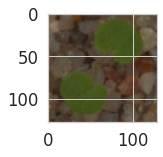

Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill
 


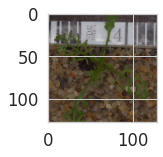

Predicted Label ['Scentless Mayweed']
True Label Scentless Mayweed
 


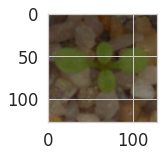

Predicted Label ['Scentless Mayweed']
True Label Shepherds Purse
 


In [ ]:
# Visualizing the predicted and correct label
# From a random selection of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', 
      enc.inverse_transform(model_7.predict(
          (X_test_normalized[2].reshape(1,128,128,3)))))
print('True Label', enc.inverse_transform(y_test_encoded)[2])
print(' ')

plt.figure(figsize=(2,2))
plt.imshow(X_test[20])
plt.show()
print('Predicted Label', 
      enc.inverse_transform(model_7.predict(
          (X_test_normalized[20].reshape(1,128,128,3)))))
print('True Label', enc.inverse_transform(y_test_encoded)[20])  
print(' ')                                            

plt.figure(figsize=(2,2))
plt.imshow(X_test[51])
plt.show()
print('Predicted Label', 
      enc.inverse_transform(model_8.predict(
          (X_test_normalized[51].reshape(1,128,128,3)))))
print('True Label', enc.inverse_transform(y_test_encoded)[51])
print(' ')                                       

# <a id= 'link17'>Conclusion</a>

From these randomly selected images shown above we can see the model does a decent job of predicting the different seedlings. Further improvements could be made by further tuning the amount of data augmentation, hypertuning the classification layers, investigating other possible models for transfer learning, or (if time and resources allows) a more customized CNN could be constructed.

Of all the seedling classes, there were three that the model had trouble predicting: *Black Grass*, *Loose Silky-Bent*, and *Shepards Purse*. If those classes were removed from the accuracy calculation our final model would have closer to 90% accuracy or higher. It may be worth investigating why the model struggles to predict these classes and what might be done to mitigate it.

Overall, we found that the VGG16 CNN archeticture appeared to perform the best on this given dataset. We also found that overuse of data augmentation and class weights can actually overly restrict our models resulting in poor performance and slow training. We may be able to leverage this knowledge by deliberatly over-restricting our models and then slowly pulling back on those restrictions to find the optimal fit in future projects.